In [1]:
import pandas as pd
import numpy as np
!ls

appUsageData.csv  CARS_ML_Clustering.ipynb


In [2]:
data = pd.read_csv("appUsageData.csv")
data.head()

,November 17,3:20 PM,com.android.documentsui,0
0,November 17,3:21 PM,com.android.settings,3
1,November 17,3:15 PM,com.whatsapp,63
2,NaN,NaN,NaN,0
3,November 17,4:20 PM,in.amazon.mShop.android.shopping,12
4,November 17,4:20 PM,com.android.documentsui,26


In [3]:
data = data.dropna(axis = 0)
data.reset_index(drop = True, inplace=True)
data.head()

,November 17,3:20 PM,com.android.documentsui,0
0,November 17,3:21 PM,com.android.settings,3
1,November 17,3:15 PM,com.whatsapp,63
2,November 17,4:20 PM,in.amazon.mShop.android.shopping,12
3,November 17,4:20 PM,com.android.documentsui,26
4,November 17,4:19 PM,com.whatsapp,191


In [4]:
data.columns = ["Date", "Time", "PackageName", "SecondsActive"]
print("Shape", data.shape)
packageCount = data.PackageName.value_counts()
print("Unique packages", packageCount.count(), end="\n\n")
print("Package - Launch count\n", packageCount, end="\n\n")
packageList = data.PackageName.unique()
print(packageList)
data.head()

Shape (307, 4)
Unique packages 34

Package - Launch count
 com.whatsapp                                   116
com.linkedin.android                            32
com.android.dialer                              18
com.android.chrome                              16
com.google.android.googlequicksearchbox         15
com.reddit.frontpage                            14
com.google.android.gm                           12
com.truecaller                                  11
org.telegram.messenger                          10
com.android.vending                             10
com.android.settings                             7
com.brave.browser_nightly                        7
com.android.messaging                            5
com.android.documentsui                          4
com.google.android.youtube                       4
com.google.android.apps.docs                     3
com.google.android.apps.photos                   2
in.amazon.mShop.android.shopping                 2
com.google.android.Goog

,Date,Time,PackageName,SecondsActive
0,November 17,3:21 PM,com.android.settings,3
1,November 17,3:15 PM,com.whatsapp,63
2,November 17,4:20 PM,in.amazon.mShop.android.shopping,12
3,November 17,4:20 PM,com.android.documentsui,26
4,November 17,4:19 PM,com.whatsapp,191


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
date = data.iloc[:,0]
first_date = int(date[0].split(' ')[1])-1
last_day = 0
month_change = False
def getNum(string):
    day = 0
    global last_day
    global month_change
    if (int(string.split(' ')[1]) > first_date) and not month_change:
        day = int(string.split(' ')[1])-first_date
        last_day = day
    else:
        month_change = True
        day = int(string.split(' ')[1]) + last_day
        
    return day
date = map(getNum, date)
date = list(date)

In [7]:
time = data.iloc[:,1]
getHours = lambda string : float(string.split(' ')[0].replace(':', '.')) if string.split(' ')[1] == "AM" else float(string.split(' ')[0].replace(':', '.'))+12
updateDate = []
time = map(getHours, time)
time = list(time)
print(date[:5])
print(time[:5])

[1, 1, 1, 1, 1]
[15.21, 15.15, 16.2, 16.2, 16.19]


In [8]:
print(len(date), len(time))

307 307


In [9]:
allPackageList = data.iloc[:,2]
print(allPackageList[:5])
colors = []
packageColorDict = {}
baseColor = 255/len(packageList)
newColor = baseColor
for package in packageList:
    colors.append(int(newColor))
    packageColorDict[package] = newColor
    newColor += baseColor
    
print(packageColorDict)

0                com.android.settings
1                        com.whatsapp
2    in.amazon.mShop.android.shopping
3             com.android.documentsui
4                        com.whatsapp
Name: PackageName, dtype: object
{'com.android.settings': 7.5, 'com.whatsapp': 15.0, 'in.amazon.mShop.android.shopping': 22.5, 'com.android.documentsui': 30.0, 'com.google.android.gm': 37.5, 'com.reddit.frontpage': 45.0, 'com.android.calculator2': 52.5, 'com.google.android.googlequicksearchbox': 60.0, 'com.google.android.apps.docs.editors.sheets': 67.5, 'com.brave.browser_nightly': 75.0, 'com.google.android.GoogleCamera': 82.5, 'com.android.messaging': 90.0, 'com.android.dialer': 97.5, 'com.linkedin.android': 105.0, 'com.aospextended.aexpapers': 112.5, 'com.android.vending': 120.0, 'com.google.android.apps.googleassistant': 127.5, 'com.google.android.apps.classroom': 135.0, 'com.google.android.youtube': 142.5, 'com.google.android.apps.photos': 150.0, 'com.truecaller': 157.5, 'com.github.android': 16

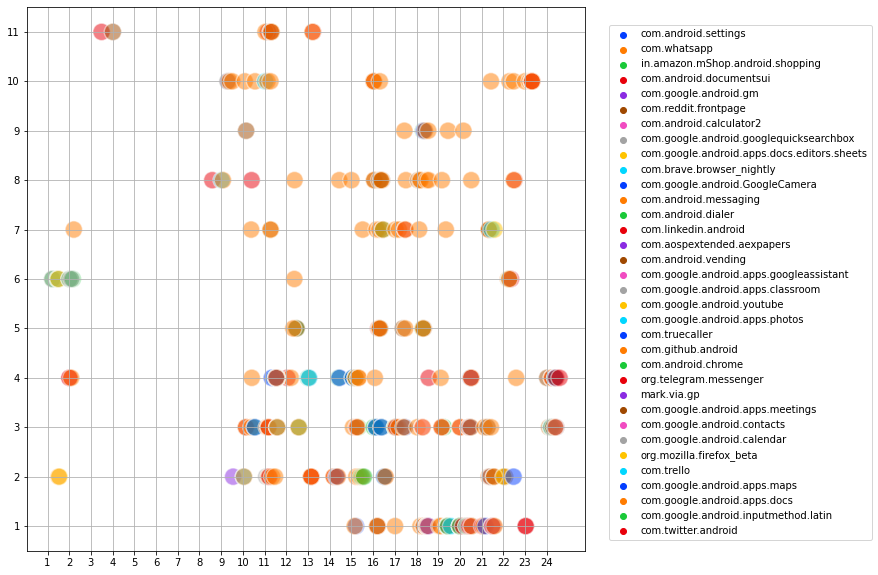

In [10]:
#time - x
#date - y
#for i in range(0, len(date), 1):
    #colors.append(packageColorDict[allPackageList[i]])
area = (300 * np.ones(len(date)))
plt.figure(figsize=(10, 10))
plt.yticks(range(date[0], date[0]+len(date)))
plt.xticks(range(1, 25))
sns.scatterplot(x = time, y = date, s = area, alpha = 0.5, hue = allPackageList, palette = "bright") #Use palette = Spectral for more clarity
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=1.8)
plt.grid(True)
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=15, init="k-means++", max_iter=500, n_init=20)
cluster_df = pd.DataFrame({'time': time, 'date': date})
pred_y = kmeans.fit_predict(cluster_df[['time', 'date']])
print(pred_y)

[ 0  0  0  0  0  0  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7
  7  7  7  7  7  7  7  7  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  4  4  6  6  6  6  6  6  6  6  6  6  6  6  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6
  6  6  6  6 10 10 10 10 10 10 10 10 10 10  9  9  9  9  9  9  9  9  9 14
 14 14 14 14 14 14 14 14 14 14 14  8  8  8  8  8  8  8  8  8  8  8  8  8
  8  6  6  4  4  4  6  6  6  6  6 10  6  6  6 10 10 10 10 10 10 10 10 10
  6  6  6 10  6  9  9  9  9  9  9  9  9  9  9 14  8  8  8  8  8 10  6  6
  6  9  9  9  9 14 14 14 14 14 12  4  4  4  4  4  4  4  4  4  2  2  2  2
  2  4 12 12 12 12  3  3  3  3  3  3  3  3  3  3  2  2  2  2  2  2  2  2
 12 12 12 12 12  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  2  2  2 11
  3  3  3  3  3  3  3  3  2 11 11 11 11 11 11 11 11 11 11 11  3  3  3  3
  3 13 13 13 13 13 13 13 13 13  1  1 11 11 11 11 11 11 11]


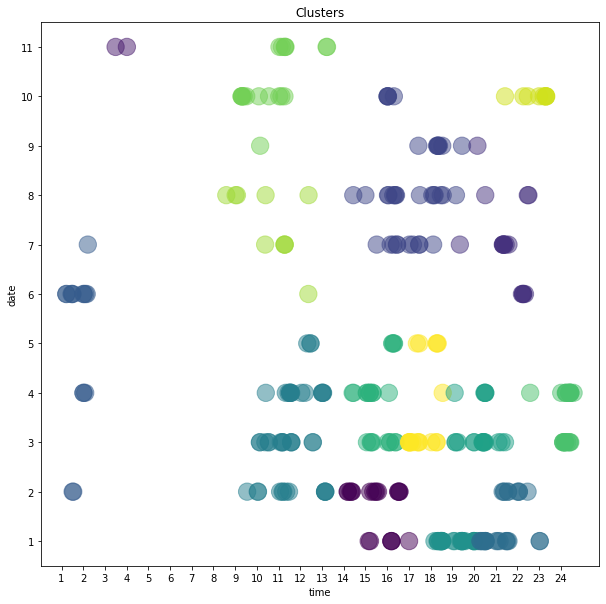

In [13]:
plt.figure(figsize=(10, 10))
plt.xlabel('time')
plt.ylabel('date')
plt.yticks(range(date[0], date[0]+len(date)))
plt.xticks(range(1, 25))
plt.scatter(cluster_df.iloc[:, 0], cluster_df.iloc[:, 1], c = pred_y, s = area, alpha = 0.5)
plt.title(f"Clusters")
plt.show();

In [34]:
cluster_dict = {}
for itr in range(0, len(pred_y), 1):
    #print(pred_y[itr], allPackageList[itr])
    if pred_y[itr] not in cluster_dict:
        cluster_dict[pred_y[itr]] = [allPackageList[itr]]
    else:
        cluster_dict[pred_y[itr]].append(allPackageList[itr])
print(len(cluster_dict), pred_y[:10], cluster_dict)

15 [0 0 0 0 0 0 7 7 7 7] {0: ['com.android.settings', 'com.whatsapp', 'in.amazon.mShop.android.shopping', 'com.android.documentsui', 'com.whatsapp', 'com.whatsapp', 'com.linkedin.android', 'com.whatsapp', 'com.linkedin.android', 'com.truecaller', 'com.whatsapp', 'com.whatsapp', 'com.whatsapp', 'com.android.dialer', 'com.whatsapp', 'com.android.dialer', 'com.linkedin.android', 'com.android.dialer', 'com.truecaller', 'com.whatsapp'], 7: ['com.whatsapp', 'com.google.android.gm', 'com.reddit.frontpage', 'com.whatsapp', 'com.android.calculator2', 'com.android.documentsui', 'com.google.android.gm', 'com.google.android.googlequicksearchbox', 'com.reddit.frontpage', 'com.google.android.apps.docs.editors.sheets', 'com.whatsapp', 'com.google.android.gm', 'com.whatsapp', 'com.whatsapp', 'com.whatsapp', 'com.brave.browser_nightly', 'com.google.android.GoogleCamera', 'com.google.android.gm', 'com.android.messaging', 'com.android.dialer', 'com.brave.browser_nightly', 'com.google.android.GoogleCamera

In [66]:
#Testing
def test_model(model, x, y):
    y_unseen = model.predict([[x,y]])
    print(y_unseen)
test_model(kmeans, 10, 2)

[6]


In [36]:
import pickle

In [46]:
#Save cluster_dict
fobject = open("cluster.bin", "wb")
pickle.dump(cluster_dict, fobject)

In [63]:
fobject_KMeans = open("Kmeans.pkl", "wb")
pickle.dump(kmeans, fobject_KMeans)

In [50]:
#read cluster
fobject = open("cluster.bin", "rb")
fcluster_dict = pickle.load(fobject)

In [61]:
from itertools import islice
print(list(islice(fcluster_dict.items(), 2)))

[(0, ['com.android.settings', 'com.whatsapp', 'in.amazon.mShop.android.shopping', 'com.android.documentsui', 'com.whatsapp', 'com.whatsapp', 'com.linkedin.android', 'com.whatsapp', 'com.linkedin.android', 'com.truecaller', 'com.whatsapp', 'com.whatsapp', 'com.whatsapp', 'com.android.dialer', 'com.whatsapp', 'com.android.dialer', 'com.linkedin.android', 'com.android.dialer', 'com.truecaller', 'com.whatsapp']), (7, ['com.whatsapp', 'com.google.android.gm', 'com.reddit.frontpage', 'com.whatsapp', 'com.android.calculator2', 'com.android.documentsui', 'com.google.android.gm', 'com.google.android.googlequicksearchbox', 'com.reddit.frontpage', 'com.google.android.apps.docs.editors.sheets', 'com.whatsapp', 'com.google.android.gm', 'com.whatsapp', 'com.whatsapp', 'com.whatsapp', 'com.brave.browser_nightly', 'com.google.android.GoogleCamera', 'com.google.android.gm', 'com.android.messaging', 'com.android.dialer', 'com.brave.browser_nightly', 'com.google.android.GoogleCamera', 'com.google.android

In [64]:
#read model
fobject_KMeans = open("Kmeans.pkl", "rb")
fKMeans = pickle.load(fobject_KMeans)

In [67]:
test_model(fKMeans, 10, 2)

[6]
